This is formatting and aligning data from Copernicus EMS data: https://rapidmapping.emergency.copernicus.eu/

In [1]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
from rasterio.crs import CRS
import pandas as pd
import fiona

In [2]:
yaml_file = '../events/tuscany_flood_2023.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'tuscany_flood_2023',
 'bounds': [10.97631339, 43.81441325, 11.15319728, 43.98650075],
 'event_date': '2023-11-02',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [15, 168],
 'mgrs_tiles': ['32TPP'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'Copernicus EMSN185',
 'links': ['https://emergency.copernicus.eu/mapping/list-of-components/EMSN185',
  'https://earthobservatory.nasa.gov/images/152051/flooding-in-tuscany']}

In [3]:
fiona.listlayers('../external_validation_data/copernicus_ems/tuscany_flood_2023/EMSN185_STD_UTM32N.gdb')

['P00_sensor_footprint',
 'P00_data_source',
 'P08DDA_DamageAssessmentP',
 'P08DDA_DamageAssessmentL',
 'P00_map_frame',
 'P00_aoi',
 'P08DDA_ObservedEventL',
 'P08DDA_ObservedEventP',
 'P20RHIA_BoundaryA',
 'P20RHIA_BoundaryL',
 'P20RHIA_BuiltupA',
 'P20RHIA_Contour',
 'P20RHIA_Facilities',
 'P20RHIA_HydrographyA',
 'P20RHIA_HydrographyL',
 'P20RHIA_NameLoc',
 'P20RHIA_TransportationA',
 'P20RHIA_TransportationL',
 'P08DDA_ObservedEventA',
 'P08DDA_DamageAssessmentA',
 'fras_aux_pppp',
 'fras_aux_ppppp',
 'fras_aux_testRaster',
 'fras_aux_zzz',
 'fras_blk_pppp',
 'fras_blk_ppppp',
 'fras_blk_testRaster',
 'fras_blk_zzz',
 'fras_bnd_pppp',
 'fras_bnd_ppppp',
 'fras_bnd_testRaster',
 'fras_bnd_zzz',
 'fras_ras_pppp',
 'fras_ras_ppppp',
 'fras_ras_testRaster',
 'fras_ras_zzz']

In [12]:
df_event = gpd.read_file('../external_validation_data/copernicus_ems/tuscany_flood_2023/EMSN185_STD_UTM32N.gdb/', layer='P08DDA_ObservedEventA')
df_event.head()

,event_type,det_method,notation,aoi_id,dmg_src_id,SHAPE_Length,SHAPE_Area,geometry
0,1,1,1,01,2,156.006294,477.368860,"MULTIPOLYGON (((671616.091 4853539.443, 671616..."
1,1,1,1,01,2,238.123451,2628.651723,"MULTIPOLYGON (((673114.400 4854768.620, 673108..."
2,1,1,1,01,2,9103.940582,243031.945976,"MULTIPOLYGON (((673066.915 4855407.040, 673075..."
3,1,1,1,01,2,5591.720848,68218.926011,"MULTIPOLYGON (((671603.594 4856593.297, 671569..."
4,1,1,1,01,2,6611.030564,30980.920840,"MULTIPOLYGON (((671097.016 4856504.479, 671118..."


<Axes: >

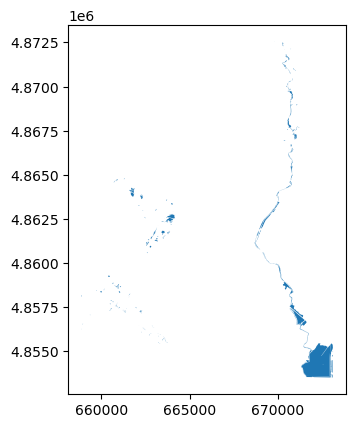

In [13]:
df_event.plot()

In [6]:
df_event = df_event.to_crs(4326)

In [7]:
df_event.total_bounds

array([10.97631339, 43.81441325, 11.15319728, 43.98650075])

In [8]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'Copernicus {event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,tuscany_flood_2023,2023-11-02,Copernicus Copernicus EMSN185,"MULTIPOLYGON (((10.97632 43.84244, 10.97635 43..."


In [9]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [10]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')
#df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')

# Extent

In [14]:
df_aoi = gpd.read_file('../external_validation_data/copernicus_ems/tuscany_flood_2023/EMSN185_STD_UTM32N.gdb/', layer='P00_aoi')
df_aoi.head()

,emsn_id,fwc_type,aoi_id,locality,country,glide_no,prod_type,SHAPE_Length,SHAPE_Area,geometry
0,EMSN185,1,01,Bisenzio river,Italy,Not Applicable,"P08.1, P13, P14",45355.459908,2.618974e+07,"MULTIPOLYGON (((673097.645 4854565.882, 673103..."
1,EMSN185,1,02,Bagnolo-Quarrata,Italy,Not Applicable,"P08.1, P13, P14",34033.616409,2.644024e+07,"MULTIPOLYGON (((661739.849 4860967.164, 662073..."
2,EMSN185,1,03,Vaiano center,Italy,Not Applicable,"P20, P13",2080.942585,2.153184e+05,"MULTIPOLYGON (((670487.047 4869944.490, 670901..."
3,EMSN185,1,04,Bisenzio North,Italy,Not Applicable,"P20, P13",10553.675808,5.948199e+05,"MULTIPOLYGON (((669895.427 4863801.048, 669919..."
4,EMSN185,1,05,Bagnolo-Bardena,Italy,Not Applicable,"P20, P13",6550.218474,7.667636e+05,"MULTIPOLYGON (((663198.213 4861981.854, 663131..."


<Axes: >

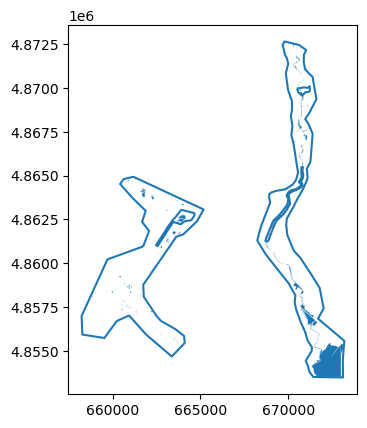

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_aoi.boundary.plot(ax=ax)
df_event.plot(ax=ax)